## July - August 2017


* Work completed 
    - Understood the format of the HiCAp data from project
    - Downloaded the 1000 Sweden frequency data
    - Using the VCFtools filtered and seperated into INdel and SNPs 
    - Took into consideration passed tagged SNPs and started to work out with it
    - Created a rough python script that would take allele frequncy from vcf files and overlap with interaction dataset
    
* Work needed to be done
    - Make the script robust so that based on the allele frequency it would make multiple argument of Rare, Common and Low frequency and ouutput corresponding interaction files of these frequency appended for example:
    python vcfmaipulation.py  InteractioData.txt -Rare --outuput interaction_common.txt
    
    - Append the functional Transcription factor and methylation (H3Kme4, H4ac27) annotation to these regions
    
    - Calcualte the enriched transcription factors in those regions
    
 

Preprocessing of BAV P-E dataset 

We find the BAV dataset and it contiand following information in its corresponding columns:
* RefSeqName
* TranscriptName
* Feature_ID
* Probe_ID
* Feature_Chr
* Feature_Start
* Feature_End
* Annotation
* Strand
* Interactor_Chr
* Interactor_Start
* Interactor_End
* distance
* BAV_rep1_SuppPairs
* BAV_rep1_p_value
* BAV_rep1.SuppPairs_combination
* BAV_rep2_SuppPairs
* BAV_rep2_p_value
* BAV_rep2.SuppPairs_combination

The following command was used for finding the average interaction change in each rows. Since the information change in BAV_rep1_SuppPairs i.e 14 and BAV_rep2_SuppPairs i.e 17 .

In [1]:
%%bash

awk '{ sum += $14; n++ } END { if (n > 0) print sum / n; }' ../data/BAV_HiCap/BAV_P-E_InteractionDataset.txt 
awk '{ sum += $17; n++ } END { if (n > 0) print sum / n; }' ../data/BAV_HiCap/BAV_P-E_InteractionDataset.txt 

20.3878
13.9396


In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

with open ("../data/BAV_HiCap/BAV_P-E_InteractionDataset.txt", 'r') as f:
    for line in f:
        A = line.strip().split("\t")
        print(A)
        print(A[12])
        break

['ABLIM1', 'NM_001003407', 'ABLIM1_116444414', 'NM_001003407_refseq', 'chr10', '116444414', '116190868', '1', '-', 'chr10', '116149220', '116150098', '-295194', '9', '0.000141264', '1_2_0_6', '6', '3.41323e-05', '0_0_5_1']
-295194


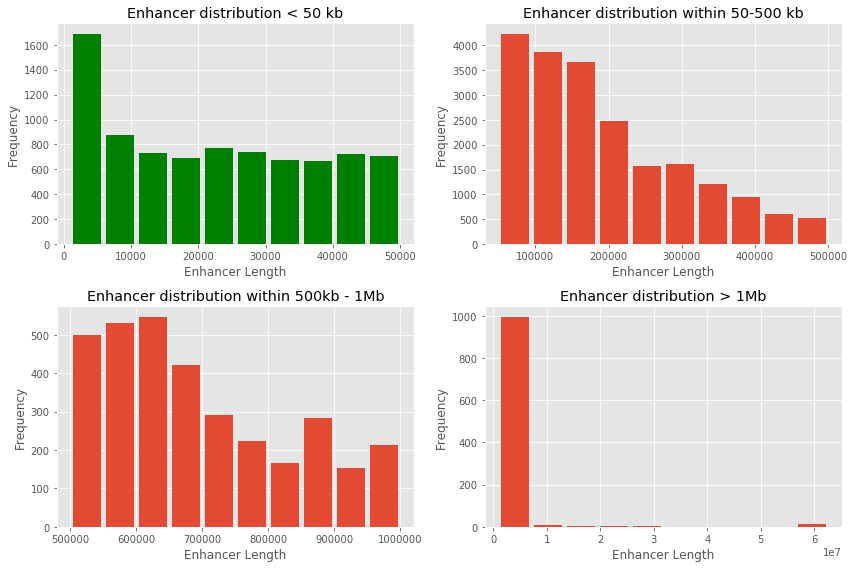

8259 20700 3334 1030


In [206]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

data = pd.read_csv('../data/BAV_HiCap/BAV_P-E_InteractionDataset.txt', sep='\t',
                   header=None, index_col =0)

fig, axes = plt.subplots(nrows=2,ncols =2, figsize=(12, 8))
ax0, ax1, ax2, ax3 = axes.flatten()

A =  np.array(abs(data[12]))
A_50kb = [i for i in A if i < 50000]
A_50_500kb = [i for i in A if i >= 50000 and i < 500000 ]
A_500_1Mb = [i for i in A if i >= 500000 and i < 1000000]
A_1Mb = [i for i in A if i > 1000000]

ax0.hist(A_50kb, histtype='bar', rwidth=0.85, facecolor='g')
ax0.set_title('Enhancer distribution < 50 kb')
ax0.set_xlabel ("Enhancer Length")
ax0.set_ylabel ("Frequency")

ax1.hist(A_50_500kb, histtype='bar', rwidth=0.85)
ax1.set_title('Enhancer distribution within 50-500 kb')
ax1.set_xlabel ("Enhancer Length")
ax1.set_ylabel ("Frequency")

ax2.hist(A_500_1Mb, histtype='bar', rwidth=0.85)
ax2.set_title('Enhancer distribution within 500kb - 1Mb')
ax2.set_xlabel ("Enhancer Length")
ax2.set_ylabel ("Frequency")

ax3.hist(A_1Mb, histtype='bar', rwidth=0.85)
ax3.set_title('Enhancer distribution > 1Mb')
ax3.set_xlabel ("Enhancer Length")
ax3.set_ylabel ("Frequency")

fig.tight_layout()
plt.show()


fig.savefig('../results/length_distribution.png')
print (len(A_50kb), len(A_50_500kb), len(A_500_1Mb), len(A_1Mb))

### August 18 2017 - Sep 05 2017

Work progress:

* Make use of argparser in vafmanipulation python script so that it would take txt and vcf file from terminal
* Use of function to output rare, common and low frequency variants from Swedgen.


I rewrote the script called as test_2.py (which I aim to rename better but at the current point it is just test script) which can now take both P-E and P-P interaction dataset. There was columns that reappered in P-P dataset which was not taekn into consideration in earlier script. By using an additional loops the script , now it can take any kind of interaction data and output the variants and number of variants in enhnacer. This script provides the genetic profile (that is common, rare and low frequency variants) of individual enhancer region.

(Run the script as below)

In [3]:
%%bash

# python test_2.py ../data/swegen_20161223/SNP_VCF.gz ../data/BAV_HiCap/BAV_P-E_InteractionDataset.txt  Rare  --output ../results/Interactor_variant/Rare_P_E.txt

# This commmand line is commented at the moment to make it inactive. However after running the
# script you would expect three files of each class in result folder.

head ../results/Interactor_variant/Lowfreq_P_E.txt

ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116149220	116150098	-295194	10,116149608,('C', 'G'),21:10,116149806,('C', 'T'),24:2
ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116296244	116297264	-148170	10,116296559,('C', 'T'),25:1
ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116313369	116314228	-131045	10,116313372,('T', 'A'),25:10,116313876,('C', 'T'),44:2
ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116332549	116333287	-111865	10,116332591,('C', 'A'),27:10,116332800,('C', 'A'),27:2
ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116384045	116384773	-60369	10,116384447,('C', 'T'),29:10,116384509,('A', 'G'),40:2
ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116411151	116413213	-33263	10,116411679,('T', 'G'),28:10,116412310,('C', 'T'),29:2
ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116414549	116415191	-29865	10,116414562,('C', 'T'),24:10,116414571,('A', 'G'),38:2
ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	


The coresponding last column is the aggregared information of varianttype. It contians information regarding the number of variants, position, Reference and alternate allele, number of individuals seperated by special charavrtes ":". The last field of this column contians the count of number of variant found in each putatative enhancer section. Further, we can dig into these individual interaction files to find number of enhancer regions with different class of variant type and subsequent analysis. This can be done in python itself.

In [4]:
## Python script to manipulate individual variant annotated interaction files

import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Low_freq = pd.read_csv('../results/Interactor_variant/Lowfreq_P_E.txt', sep='\t',header=None, index_col =0)
Common = pd.read_csv('../results/Interactor_variant/Common_P_E.txt', sep='\t',header=None, index_col =0)
Rare = pd.read_csv('../results/Interactor_variant/Rare_P_E.txt', sep='\t',header=None, index_col =0)

LowFreq_number = []
Common_number =[]
Rare_number= []

for line in Low_freq[11]:
    line = line.strip().split(":")
    LowFreq_number.append(int(line[-1]))
    
for line in Common[11]:
    line = line.strip().split(":")
    Common_number.append(int(line[-1]))

for line in Rare[11]:
    line = line.strip().split(":")
    Rare_number.append(int(line[-1]))

print ("The number of ehancer in Common "+  str(len(Common)) + " and corresponding variant counts is "+ str(sum(Common_number)))   
print ("The number of ehancer in low frequency " + str(len(Low_freq))+ " and corresponding variants count is " + str(sum(LowFreq_number)))
print ("The number of ehancer in Rare " + str(len(Rare))+ " and corresponding sum of variants count is " + str(sum(Rare_number)))

The number of ehancer in Common 22055 and corresponding variant counts is 56891
The number of ehancer in low frequency 14403 and corresponding variants count is 24049
The number of ehancer in Rare 22144 and corresponding sum of variants count is 47281


In [5]:
import re

def getallelecount(numpyarray):
    regex = r"(\d+\:\d+)+"
    allelecount = []
    for line in numpyarray:
        m = re.finditer(regex, str(line))
        for match in m:
            freq = match.group().split(":")[0]
            allelecount.append(freq)
    return (allelecount)

Common_allele_counts = getallelecount(Common[11])
Low_allele_counts = getallelecount(Low_freq[11])
Rare_allele_counts = getallelecount(Rare[11]) 


In [6]:
print (len(Common_allele_counts))
#print ((Common_allele_counts)[1:100])
print (len(Low_allele_counts))
print (len(Rare_allele_counts))

56880
24044
47260


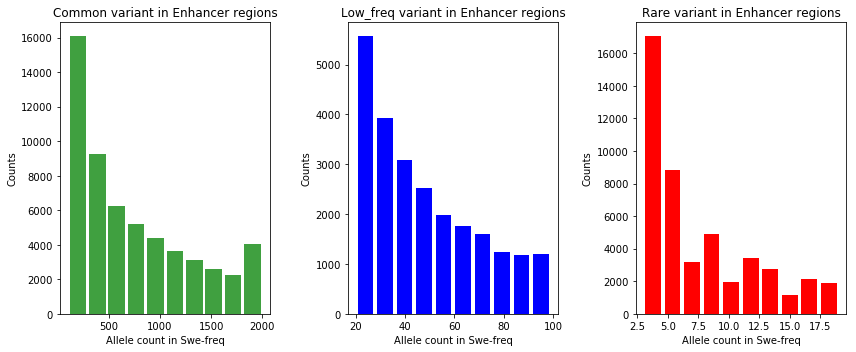

In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

data_Common = [int(i) for i in Common_allele_counts]
data_LF = [int(i) for i in Low_allele_counts]
data_Rare = [int(i) for i in Rare_allele_counts]

fig, (ax0, ax1,ax2) = plt.subplots(ncols=3, figsize=(12, 5))

ax0.hist(data_Common, facecolor='g', alpha=0.75, rwidth=0.85)
ax0.set_title('Common variant in Enhancer regions')
ax0.set_xlabel ("Allele count in Swe-freq")
ax0.set_ylabel ("Counts")

ax1.hist(data_LF, facecolor='b', rwidth=0.8)
ax1.set_title('Low_freq variant in Enhancer regions')
ax1.set_xlabel ("Allele count in Swe-freq")
ax1.set_ylabel ("Counts")

ax2.hist(data_Rare, facecolor='r', rwidth=0.8)
ax2.set_title('Rare variant in Enhancer regions')
ax2.set_xlabel ("Allele count in Swe-freq")
ax2.set_ylabel ("Counts")

fig.tight_layout()
plt.show()
fig.savefig('../results/Distibution_allelecount.png')

---------------------------------------

### Sep15 - Oct 1 2017

* Made and updated the new script
* Made a script for Transcription factor, methylation mark and DNAise hypersensitive elements

Here, we have now made the rare, common and low frequency variant annotated list in our earlier outputted file. Now we want to make a script that takes the different functional non coding elements from chipseq atlas and annotates it based on the script. As I want to work with only one file for developing the script, I took rare varaint as model data to make the scripts.

Again important thing is to look for the interaction chromosome, start and end postion and using a bedtools interscect, find the regions that are overlapping these regions and annotate based on these regions. I can use a BEDTools already present in the moilou. Howver, I want to write a python script that can be used in python. For this there were two thing to look forward to. Firstly it was whether there are bedtools wrapper for python or not and secondly parse both the output from the VCF manipulation from earlier files.

I searched for bedtools wrapper in google and there is [pybedtools](https://pypi.python.org/pypi/pybedtools) module in python. Following the package, I am looking into [github page](https://daler.github.io/pybedtools/index.html). 


#### Downloading files from Chipseq atlas (browsed on Sep20th 2017)

Chipseq atlas, as name suggests have repository of chipseq experiments from different experiments, primary cells and celline data. I downloaded the experimental results for [HUVEC dataset](https://en.wikipedia.org/wiki/Human_umbilical_vein_endothelial_cell). As the name suggests, there are the cells from the endothelial cells. As we are looking in disease pertaining to aortic cell (BAV:- Biscupid aortic valve), we considered into looking into this dataset. Following critera was included while downloading files relating to mehtylation, transcription factor and DNAise data:

* Threshold significance of 100
* Against all the antigens

All the downloaded data set were stored in following /Users/salendrapradh/Documents/Rare_variants_atherosclerosis/data/Annotation_Chipseq


In [208]:
%%bash

head -n 2 ../results/Interactor_variant/Rare_P_E.txt
zmore ../data/Annotation_Chipseq/His.CDV.10.AllAg.HUVEC.bed.gz | head -n 2

ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116149220	116150098	-295194	10,116149247,('T', 'C'),3:10,116149344,('T', 'C'),3:10,116149375,('G', 'A'),5:10,116149823,('T', 'C'),3:4
ABLIM1	NM_001003407	chr10	116444414	116190868	1	-	chr10	116285363	116286320	-159051	10,116285432,('T', 'C'),15:10,116286294,('G', 'A'),8:2
track name="His (@ HUVEC) 100" url="http://chip-atlas.org/view?id=$$" gffTags="on"
chr1	9859	10480	ID=SRX335069;Name=H3K4me3%20(@%20HUVEC);Title=GSM1208344:%20HUVEC%20H3K4me3%20VEGF%201h%3B%20Homo%20sapiens%3B%20ChIP-Seq;Cell%20group=Cardiovascular;<br>source_name=HUVEC_H3K4me3%20VEGF%20plus;cell%20type=human%20umbilical%20vein%20endothelial%20cells;stimulation=VEGF;chip%20antibody=H3K4me3%20(kindly%20provided%20by%20Dr.%20Kimura,%20Osaka%20University);	970	.	9859	10480	255,30,0


It was evidently clear that files chipseq altlas needed further cleaning in order to intersect with our Interctoin_varaint annotated files . This first attempt was made to make bed files for bot the dataset.

In [9]:
%%bash


awk '{print $8"\t"$9"\t"$10"\t"$3":"$4":"$5":"$1}' ../results/Interactor_variant/Rare_P_E.txt |sort -k1,1 -k2,2n | head

########### Commented out in later tries as the files are already made

#awk '{print $8"\t"$9"\t"$10"\t"$3":"$4":"$5":"$1}' ../results/Interactor_variant/Rare_P_E.txt |\
#sort -k1,1 -k2,2n > ../data/P_E_Interaction_Rare.bed
#awk '{print $8"\t"$9"\t"$10"\t"$3":"$4":"$5":"$1}' ../results/Interactor_variant/Common_P_E.txt |\
#sort -k1,1 -k2,2n > ../data/P_E_Interaction_Common.bed
#awk '{print $8"\t"$9"\t"$10"\t"$3":"$4":"$5":"$1}' ../results/Interactor_variant/Lowfreq_P_E.txt |\
#sort -k1,1 -k2,2n > ../data/P_E_Interaction_Low_freq.bed

chr1	936007	937557	chr1:948846:949919:ISG15
chr1	940882	941757	chr1:948846:949919:ISG15
chr1	1004619	1005889	chr1:948846:949919:ISG15
chr1	1198212	1198971	chr1:948846:949919:ISG15
chr1	1244723	1245867	chr1:948846:949919:ISG15
chr1	1293377	1294192	chr1:948846:949919:ISG15
chr1	1296637	1297463	chr1:1298921:1288068:MXRA8
chr1	4019808	4020519	chr1:5624130:5624203:MIR4417
chr1	5531144	5532843	chr1:5624130:5624203:MIR4417
chr1	6052826	6053291	chr1:6094347:6161253:KCNAB2


The aim to annotate these rare variants - enhacer regions with methylation marks so we have to overlap above made bed files with methylation marks bed files. In order to find the regions enriched with putative enhancer marks, we decided to use mehtylation marks of two types [H327ac](https://en.wikipedia.org/wiki/H3K27ac) and H3Kme1 . These methylation regions are the hallmakrs for active enhancers in the [regions](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3857148/pdf/nihms441765.pdf). Thus in the earlier downloaded file we have to make the additional steps to find these annotation marks. In order to do some, we have to first find the number rows  of annotation in the files. This can be done using wc -l command.

In [10]:
%%bash
zmore  ../data/Annotation_Chipseq/His.CDV.10.AllAg.HUVEC.bed.gz | wc -l

 1249971


Oho snap!!! that a lot of rows to annnotate for. Thus we have to take into consideration only those marks with the ealier annotation status of H3K4me1 and H3K27ac. Lets see how many genomic coordinates we can get. This can be done with the following one liner.

In [12]:
%%bash 

sed '1d' ../data/His.CDV.10.AllAg.HUVEC.bed |\
awk -F '[\t;=%]' '{print $1"\t"$2"\t"$3"\t"$7}' |\
awk '{if ($4 == "H3K27ac" || $4 == "H3K4me1") {print $0}}'| wc -l


  710103


Similar pipeline was applied for getting chipseq experiment targetting various transcription factor  from chipseq atlas. However, there were some dubious transcription factor named as Epitope, Thus we removed the it. The following bash script would be efficient enough to remove and output it in effiecient manner.

In [18]:
%%writefile ../src/getTFs.sh
#!/bin/bash

if [ $# -eq 0 ]
then
    echo "Usage: No files from chipatlas supplied"
    exit 1
fi 

for i in $*
do
    echo $i
    name=${i:0:14}
    tail=${i:24:33}
    echo $name$tail
    sed '1d' $i |\
    awk -F '[\t;=%]' '{print $1"\t"$2"\t"$3"\t"$7}'  > $name$tail 
    ## Currently hardcoded to output the files to data folder the filtered files 
done

Overwriting ../src/getTFs.sh


In [13]:
%%bash

chmod +x ../src/getTFs.sh
 ../src/getTFs.sh ../data/Oth.CDV.10.AllAg.HUVEC.bed ../data/DNS.CDV.10.AllAg.HUVEC.bed 
 
 head ../data/Oth.CD.HUVEC.bed
 head ../data/DNS.CD.HUVEC.bed
 
 awk '{if ($4 != "Epitope") {print $0}}' ../data/Oth.CD.HUVEC.bed > tmp; mv tmp ../data/Oth.CD.HUVEC.bed 
 head ../data/Oth.CD.HUVEC.bed

../data/Oth.CDV.10.AllAg.HUVEC.bed
../data/Oth.CD.HUVEC.bed
../data/DNS.CDV.10.AllAg.HUVEC.bed
../data/DNS.CD.HUVEC.bed
chr1	9821	10363	MEF2C
chr1	9851	10439	MEF2C
chr1	9862	10323	GATA2
chr1	9868	10392	GATA2
chr1	9880	10436	NFATC1
chr1	9886	10367	GATA2
chr1	9894	10445	RELA
chr1	9896	10451	Epitope
chr1	9897	10435	FOS
chr1	9898	10432	NFATC1
chr1	9994	10233	DNase-Seq
chr1	10006	10280	DNase-Seq
chr1	10016	10103	DNase-Seq
chr1	10354	10474	DNase-Seq
chr1	11232	11352	DNase-Seq
chr1	13312	13606	DNase-Seq
chr1	13477	13566	DNase-Seq
chr1	29119	29424	DNase-Seq
chr1	29247	29362	DNase-Seq
chr1	29358	29385	DNase-Seq
chr1	9821	10363	MEF2C
chr1	9851	10439	MEF2C
chr1	9862	10323	GATA2
chr1	9868	10392	GATA2
chr1	9880	10436	NFATC1
chr1	9886	10367	GATA2
chr1	9894	10445	RELA
chr1	9897	10435	FOS
chr1	9898	10432	NFATC1
chr1	9898	10441	RELA


Since with simple exploration of genomic coordinates we see these files can be made a bed4 files and used for  further manupilaitoin with the python bed files. So I made a bed4 files for both of the original files. There was some contigs regions in the orignial bed files from chipseq. Our interaction data  have only the proper chromosomes such as (Chr1-ChrX). Thus further modification was done in the earlier snippet of one liners thus to get the propere bed4 files.

In [23]:
%%bash

 sed '1d' ../data/His.CDV.10.AllAg.HUVEC.bed |\
 awk -F '[\t;=%]' '{print $1"\t"$2"\t"$3"\t"$7}' |awk '{if ($4 == "H3K27ac" || $4 == "H3K4me1") {print $0}}' |\
 egrep  '(chr[0-9]|chr[0-9][0-9])|(chrX)' |egrep  -v '(chr[0-9]_|chr[0-9][0-9]_)' | wc -l
 


  707502


This two earlier snippet of commands give the 2 bed4 files that are now can be used in python bedtools. Two new bed files, *P_E_Interaction_Rare.bed* and *His_CDV_2.bed* were made in data folder. This simple example gives us the number of interaction 

In [209]:
import pybedtools 

interaction_bed = pybedtools.BedTool('../data/P_E_Interaction_Rare.bed')
hist_mod_bed = pybedtools.BedTool('../data/His_CDV_2.bed')

interaction_bed.head()
hist_mod_bed.head()

interaction_and_hist = interaction_bed.intersect(hist_mod_bed, wo = True)

#interaction_and_hist.head()
#interaction_and_hist.count()



chr1	936007	937557	chr1:948846:949919:ISG15
 chr1	940882	941757	chr1:948846:949919:ISG15
 chr1	1004619	1005889	chr1:948846:949919:ISG15
 chr1	1198212	1198971	chr1:948846:949919:ISG15
 chr1	1244723	1245867	chr1:948846:949919:ISG15
 chr1	1293377	1294192	chr1:948846:949919:ISG15
 chr1	1296637	1297463	chr1:1298921:1288068:MXRA8
 chr1	4019808	4020519	chr1:5624130:5624203:MIR4417
 chr1	5531144	5532843	chr1:5624130:5624203:MIR4417
 chr1	6052826	6053291	chr1:6094347:6161253:KCNAB2
 chr1	9911	10406	H3K27ac
 chr1	9915	10365	H3K27ac
 chr1	9917	10263	H3K27ac
 chr1	9930	10221	H3K27ac
 chr1	9930	10224	H3K27ac
 chr1	9934	10221	H3K27ac
 chr1	9951	10213	H3K27ac
 chr1	9966	10242	H3K4me1
 chr1	9974	10265	H3K4me1
 chr1	10003	10228	H3K27ac
 

Using the earlier concepts and I made a new script called **genome.tf.py** that would take the result from the earlier vcfmanipulation.py from earlier analysis and take annotation files (in the earlier example Histone modification files). Now I am developing it such that it would take multiple annotation files and append the information in the earlier VCF manipulation files.


### Update on Sep 30 2017.

After working with the script for couple of days, a new script is made that takes all the individual interaction files, bed files of annotated, and individual bed files of non coding elements and annotetes individual enhancer regions. 

In [15]:
%%bash

## Commented out for secondary runs. Ran in primary runs to give the files needed
#python ../src/genome_tf.py ../results/Interactor_variant/Rare_P_E.txt ../data/P_E_Interaction_Rare.bed ../data/DNS.CD.HUVEC.bed ../data/His_CDV_2.bed ../data/Oth.CD.HUVEC.bed  -o ../results/Interactor_variant/Rare_P_E_TFs.txt
#python ../src/genome_tf.py ../results/Interactor_variant/Common_P_E.txt ../data/P_E_Interaction_Common.bed ../data/DNS.CD.HUVEC.bed ../data/His_CDV_2.bed ../data/Oth.CD.HUVEC.bed  -o ../results/Interactor_variant/Common_P_E_TFs.txt
#python ../src/genome_tf.py ../results/Interactor_variant/Lowfreq_P_E.txt ../data/P_E_Interaction_Low_freq.bed ../data/DNS.CD.HUVEC.bed ../data/His_CDV_2.bed ../data/Oth.CD.HUVEC.bed  -o ../results/Interactor_variant/Low_P_E_TFs.txt


In [146]:
## Function to manipulate individual Common, Low Frequency and Rare a

import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def nonfun_ele(pd_dataframe):
    '''
    Provides the count of DNaise hypersensitivity , methylation marks and transscription factor binding sites
    in the resulting P_E_TF dataset. It gives list of elelment in following orders
    
    [DHS|HMM|TFs, DHS, HMM, TFs, DHS+HMM, DHS+TFs, HMM+TFs, DHS+HMM+TFs]
    ''' 
    a,b,c,d,e,f,g,h = 0,0,0,0,0,0,0,0
    for index, rows in pd_dataframe.iterrows():
        if rows[12] != '0' or  rows [13] != '0' or rows [14] != '0':
            a += 1
        if rows[12] != '0':
            b += 1
        if rows[13] != '0':
            c += 1
        if rows [14] != '0':
            d += 1
        if rows[12] != '0' and  rows [13] != '0':
            e += 1
        if rows [12] != '0' and rows [14] != '0':
            f += 1
        if rows[13] != '0' and rows [14] != '0':
            g += 1
        if rows[12] != '0' and  rows [13] != '0' and rows [14] != '0':
            h += 1
    return([a,b,c,d,e,f,g,h])
        
Low_freq = pd.read_csv('../results/Interactor_variant/Low_Freq_P_E_TFs.txt', sep='\t',header=None, index_col =0)
Common = pd.read_csv('../results/Interactor_variant/Common_P_E_TFs.txt', sep='\t',header=None, index_col =0)
Rare = pd.read_csv('../results/Interactor_variant/Rare_P_E_TFs.txt', sep='\t',header=None, index_col =0)

tmp1 = Common[[12,13,14]] 
TF_status_Common = nonfun_ele(tmp1)

tmp2 = Low_freq[[12,13,14]] 
TF_status_LF = nonfun_ele(tmp2)

tmp3 = Rare[[12,13,14]] 
TF_status_Rare = nonfun_ele(tmp3)

TF_status =  np.vstack((TF_status_Common,TF_status_LF,TF_status_Rare))

In [147]:
TF_status

array([[5087, 3350, 3029, 3416, 2042, 2487, 1744, 1565],
       [3407, 2276, 2038, 2356, 1393, 1736, 1229, 1095],
       [5178, 3440, 3097, 3524, 2114, 2587, 1820, 1638]])

In [192]:
import numpy as np
import matplotlib.pyplot as plt

df2 = pd.DataFrame(TF_status,  columns=['at_least_one', 'DNS', 'HM', 'TFs', 'DNS+HM', 'DNS+TFs','HM+TFs', 'ALL'])
df2 

,at_least_one,DNS,HM,TFs,DNS+HM,DNS+TFs,HM+TFs,ALL
0,5087,3350,3029,3416,2042,2487,1744,1565
1,3407,2276,2038,2356,1393,1736,1229,1095
2,5178,3440,3097,3524,2114,2587,1820,1638


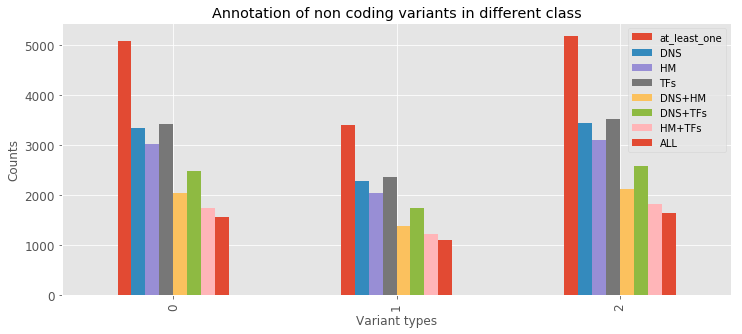

In [204]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.9

ax = df2.plot(kind='bar', title ="Annotation of non coding variants in different class", figsize=(12, 5), legend=True, fontsize=12)
ax.set_xlabel("Variant types", fontsize=12)
ax.set_ylabel("Counts", fontsize=12)
plt.show()
fig.savefig('../results/Enhancer_elements.png')


From the above chart, it can been said that we have at least one of functional markers in about (5087/22055) 23% of putative enhacer in all classes of variants. However, it has to be considered that we took into consideration one of cellline and these are the markers specific to cell type. Most intersting , we still find at least 1000 putatively, functional enhancers in all classes in all. It would be interesting to see these functional enhancer regions and dig into Rare and Low frequency varaints in these region. More intersting, it would be interesting if any of these varaints are earlier implicated in any arthesceloris heart diseases. Furthermore, these are result only from overlpaaing with one dataset. This data has to be randomized and overlapped so as to find the putative p-values to our non coding functional elements 

In [213]:
(3407/14403)*100

23.6547941401097

---------------------------------------

### GO-Ontology of interaction data with annotation of Rare variants

In order to find the any biological process that had been enriched in our interaction data, we set to do GO enrichment analysis in our dataser. Again we have to download GO term from some database, we used following (quickGO)[https://www.ebi.ac.uk/QuickGO-Old/]. From this database we subsetted to  following parameters to get the final output file. 
IDmapping was checked for following tags
* UniprotKB
* GeneID
* HGNC
* Refseq

Similarly, for filter annotation again we checked the following box
* Taxon = Human
* Evidence = Manual Experimental i.e IMP,IGI,IPI,IDA,IEP,EXP
* Aspect = Biological process 

We used these subsetting in order to make the GO terms that are true with experimental evidences. Additionally, to limit our results to fine subset. This would give us 44,565 GO for 8,569 proteins. This is download form (this website)[https://www.ebi.ac.uk/QuickGO-Old/GAnnotation] and download as gzip files and stored in data folder as association as .gzfiles. As shown in following table, this file consists of different columns subc as datbase symbols Qualifier, GOterm and GOID, Evidences name and symbols. This is quite raw format and would like to process with the earlier Rare_varaints_annaotated interaction data to get the GO terms that each gene would be present to.

In [6]:
%%bash 

gzip -cd ../data/associations.tsv.gz |head
gunzip ../data/associations.tsv.gz

DB	ID	Symbol	Qualifier	GO ID	GO Name	Aspect	Original GO ID	Original GO Name	Evidence	Reference	Name	Synonym
UniProtKB	A0A087WUF6	FGF2	-	GO:0014843	growth factor dependent regulation of skeletal muscle satellite cell proliferation	Process	GO:0014843	growth factor dependent regulation of skeletal muscle satellite cell proliferation	IMP	PMID:18602469	Fibroblast growth factor	A0A087WUF6_HUMAN|FGF2
UniProtKB	A0A087X1C5	CYP2D7	-	GO:0006805	xenobiotic metabolic process	Process	GO:0006805	xenobiotic metabolic process	IDA	PMID:15051713	Putative cytochrome P450 2D7	CP2D7_HUMAN|CYP2D7
UniProtKB	A0A087X1C5	CYP2D7	-	GO:0042738	exogenous drug catabolic process	Process	GO:0042738	exogenous drug catabolic process	IDA	PMID:15051713	Putative cytochrome P450 2D7	CP2D7_HUMAN|CYP2D7
UniProtKB	A0A087X1C5	CYP2D7	NOT	GO:0006805	xenobiotic metabolic process	Process	GO:0006805	xenobiotic metabolic process	IDA	PMID:18838503	Putative cytochrome P450 2D7	CP2D7_HUMAN|CYP2D7
UniProtKB	A0A087X1C5	CYP2D7	NOT	GO:004273

However, it is better organize the data into some sorted form before feeding into python program so that it would be easier to work. 

In [8]:
%%bash

(head -n 1 ../data/associations.tsv && tail -n +2 ../data/associations.tsv |\
sort -k 5,5) > ../data/sorted_association.tsv

head ../data/sorted_association.tsv

DB	ID	Symbol	Qualifier	GO ID	GO Name	Aspect	Original GO ID	Original GO Name	Evidence	Reference	Name	Synonym
UniProtKB	O60313	OPA1	-	GO:0000002	mitochondrial genome maintenance	Process	GO:0000002	mitochondrial genome maintenance	IMP	PMID:18158317	Dynamin-like 120 kDa protein, mitochondrial	OPA1_HUMAN|OPA1|KIAA0567
UniProtKB	P19971	TYMP	-	GO:0000002	mitochondrial genome maintenance	Process	GO:0000002	mitochondrial genome maintenance	IMP	PMID:9924029	Thymidine phosphorylase	TYPH_HUMAN|TYMP|ECGF1
UniProtKB	P39210	MPV17	-	GO:0000002	mitochondrial genome maintenance	Process	GO:0000002	mitochondrial genome maintenance	IMP	PMID:16582910	Protein Mpv17	MPV17_HUMAN|MPV17
UniProtKB	Q96CQ1	SLC25A36	-	GO:0000002	mitochondrial genome maintenance	Process	GO:0000002	mitochondrial genome maintenance	IDA	PMID:25320081	Solute carrier family 25 member 36	S2536_HUMAN|SLC25A36
UniProtKB	Q9BQP7	MGME1	-	GO:0000002	mitochondrial genome maintenance	Process	GO:0000002	mitochondrial genome maintenance	IMP	PMID:233

Now the following called Gene_ontology is written in python that takes these sorted assciation tsv files and gives the numeber of interaction genes in Go terms that are enriched in current analysis.

Following python script called as Gene_ontology.py was written and run in order to find the gene ontology analysis for interaction files. The code is run as follows:

In [2]:
%%bash

python ../src/Gene_ontology.py  ../data/sorted_association.tsv  ../data/tmp.txt  -o ../data/GO_Term.txt  